In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing  # Using California Housing dataset


In [3]:
# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Target'] = housing.target  # Add target column (House Prices)

# Display first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Select one feature for simplicity
X = df[['MedInc']].values  # Feature: Median Income
y = df['Target'].values  # Target: House Price

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


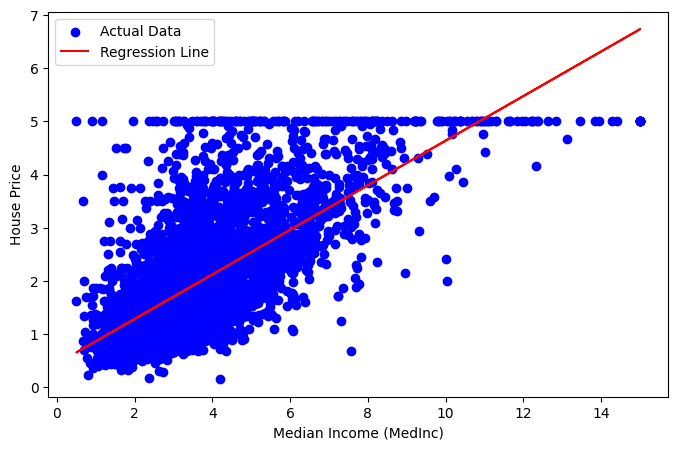

In [5]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Plot results
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Price')
plt.legend()
plt.show()


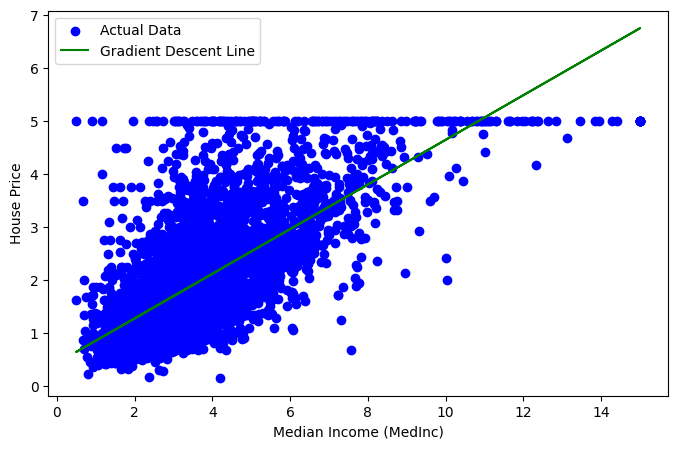

In [6]:
# Gradient Descent for Linear Regression
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    n = len(y)
    B0, B1 = 0, 0  # Initialize parameters

    for _ in range(iterations):
        y_pred = B0 + B1 * X.flatten()  # Predicted values
        dB0 = (-2/n) * sum(y - y_pred)  # Gradient for B0
        dB1 = (-2/n) * sum(X.flatten() * (y - y_pred))  # Gradient for B1
        B0 -= learning_rate * dB0
        B1 -= learning_rate * dB1

    return B0, B1

# Train model with gradient descent
B0, B1 = gradient_descent(X_train, y_train)

# Predictions using optimized B0, B1
y_pred_gd = B0 + B1 * X_test.flatten()

# Plot gradient descent results
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred_gd, color='green', label='Gradient Descent Line')
plt.xlabel('Median Income (MedInc)')
plt.ylabel('House Price')
plt.legend()
plt.show()


In [7]:
# Model Evaluation for Scikit-Learn Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R-squared (R² Score): {r2:.4f}')


Mean Absolute Error (MAE): 0.6299
Mean Squared Error (MSE): 0.7091
Root Mean Squared Error (RMSE): 0.8421
R-squared (R² Score): 0.4589
